# Part I - (Dataset Exploration for Ford GoBike)

### worked by (Your Name/2024 )

## Introduction

.

> **Let's introduce our dataset:**


======================================

.

**This data set information was produced from `Ford GoBike` System** the information in it talked about individual rides that were made in a bike-sharing system for covering San Francisco Bay area.** 

.




> ## And here are the main exploring questions 



   **==================================================**



- What is the structure of your dataset?


- What are the main interesting features in the dataset?


- What features in the dataset supported my investigation for these interesting features?




.

> ### Also here are the investigative questions classified into three types



   **================================================**
   
   


###  <a href='#011'> Univariate Exploration</a> 

- <a href='#1'> 1 ) . What is the distribution of `User type`?</a>  
- <a href='#2'> 2 ) . What is the distribution for the `bike share users on all Trips`?</a>  
- <a href='#3'> 3 ) . What is the distribution for users' `ages`?</a>  
- <a href='#4'> 4 ) . Do the users' ages have `outlier` values?</a>
- <a href='#5'> 5 ) . What is the distribution for the trip duration in `minutes`? </a>
- <a href='#6'> 6) . What is the distribution for `member_gender`? </a>
- <a href='#7'> 7) . What is the distribution for the trip duration in `Hours`?  </a>




##  <a href='#111'> Bivariate Exploration</a> 


- <a href='#8'> 8 ) . What the `average duration` of trip for the categories of `user type`? </a>
- <a href='#9'> 9 ) . How long is the duration of the trip for `each gender` in `minutes`? </a>
- <a href='#10'> 10 ) . How long is the duration of the trip for each `user_type` in `minutes`?  </a>
- <a href='#11'> 11 ) . How the user distribution depending on their `Age` and `user_type` ?</a>
- <a href='#12'>12 ). How the user distribution depending on their `Age` and `member_gender` ?  </a>


##  <a href='#1111'> Multivariate Exploration</a> 


- <a href='#13'> 13 ) . What is the Correlation between `each` variable in the dataset?</a>  
- <a href='#14'> 14 ) . What is the Correlation between `specific numeric variables` in the dataset?</a>  
- <a href='#15'> 15 ) . What is the  Correlation between `data_stat` variables in the dataset?</a>  


##  <a href='#1100'> Conclusions </a> 





# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

In [27]:
import os
import random
from datetime import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [28]:
# Load my dataset using pandas Dataframe
df = pd.read_csv("fordgobike-tripdataFor201902.csv")
display(df.head(5))
df.shape


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


(183416, 16)

In [29]:
# here we make overview in high-level for data shape and composition
df.shape

(183416, 16)

In [30]:
## check each var datatype
dtype = df.dtypes
n_unquie = df.nunique()

pd.DataFrame({"Data Type":dtype , "Num Unique":n_unquie}).T


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
Data Type,int64,object,object,float64,object,float64,float64,float64,object,float64,float64,int64,object,float64,object,object
Num Unique,4752,35783,35767,329,329,334,335,329,329,335,335,4646,2,75,3,2


In [31]:
## I display 15 rows to understand the content values more
df.head(15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [32]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183416.000000,183219.000000,183416.000000,183416.000000,183219.000000,183416.000000,183416.000000,183416.000000,175151.000000
mean,726.067311,138.590365,37.771221,-122.352661,136.249401,37.771425,-122.352247,4472.890260,1984.806504
std,1794.371831,111.778938,0.099586,0.117100,111.514916,0.099494,0.116677,1664.386068,10.116589
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000




> ### What is the structure of your dataset?





- The structure of the dataset contains  ..8... columns and ...183419.... rows.
 
 
- Most variables are ...... in nature , and here are **dtypes summary :**

        - .....(7)
        - .....(2)
        - .....(7)
        



> ### What are the main interesting features in the dataset?







 **We got three main feature areas which are :**


 
 
 
- Start Station name & End Station Name
 
 
 
- User Type & Gender
 
  
 
  
- duration_sec




> ### What features in the dataset supported my investigation for these interesting features?



- duration_sec



- start_time



- member_birth_year



- user_type




- start_station_name




##  More Exploring ideas to begin my investigation

In [33]:
#This code for describing statistical data ideas in a more organized and readable table
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183416.000000,183219.000000,183416.000000,183416.000000,183219.000000,183416.000000,183416.000000,183416.000000,175151.000000
mean,726.067311,138.590365,37.771221,-122.352661,136.249401,37.771425,-122.352247,4472.890260,1984.806504
std,1794.371831,111.778938,0.099586,0.117100,111.514916,0.099494,0.116677,1664.386068,10.116589
min,61.000000,3.000000,37.317298,-122.453705,3.000000,37.317298,-122.453705,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [34]:
# display the information about each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

## The above result show some missing values exist in some columns So let's display them

In [35]:
#yOUR CODES
null = df.isnull().sum()
ratio = null / df.shape[0]

pd.DataFrame({"NumberOfNull":null , "RatioOfNull":ratio}).T

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
NumberOfNull,0.0,0.0,0.0,197.000000,197.000000,0.0,0.0,197.000000,197.000000,0.0,0.0,0.0,0.0,8265.000000,8265.000000,0.0
RatioOfNull,0.0,0.0,0.0,0.001074,0.001074,0.0,0.0,0.001074,0.001074,0.0,0.0,0.0,0.0,0.045061,0.045061,0.0




> ## The result above shows many missing data



###  To fix this issue You will fill these values with .....<mark>MEAN</mark>...... for numeric and ...<mark>MODE</mark>...for categorical

### Drop unnecessary Columns

In [36]:
df.drop(["end_station_id" , "start_station_id" , "bike_id" , "bike_share_for_all_trip" ], axis=1 , inplace = True)

In [37]:
df.columns  #Before Droping

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

In [38]:
df.columns  #After Droping

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

In [39]:
# trying to fill missing values in my datset using for loop
cols_have_null_values = ['start_station_name','end_station_name','member_birth_year','member_gender']

for cols in cols_have_null_values:
    mode = df[cols].mode()[0]
    df[cols] = df[cols].fillna(mode)
df["member_birth_year"] = df["member_birth_year"].fillna(df["member_birth_year"].median())



In [40]:
#check the Nulls
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

### **And with a proper category for other (member gender)**

- Failuer Attempts
  still got a missing value in the member_gender, so let's explore this column more
 mode = df["member_gender"].mode()

 for i in df["member_gender"]:
     if i == "Other":
         df["member_gender"].replace(i,"female")

 def get_other(v):
     for i in df["member_gender"]:
         if i == "Other":#             print(i.sum())
     return v
 get_other(df["member_gender"])

In [41]:
target_values = "Other"
count_other = df["member_gender"].value_counts()[target_values]
print(f"The Number OF Others In this Column : {count_other}")

def change_gender(value):
    if value == "Other":
        return random.choice(["male","female"])
    return value

df["member_gender"] = df["member_gender"].apply(change_gender)
print(df["member_gender"].head(15))

The Number OF Others In this Column : 3652
0       Male
1       Male
2       Male
3       male
4       Male
5       Male
6     Female
7       Male
8     female
9       Male
10    Female
11      Male
12      Male
13      Male
14      Male
Name: member_gender, dtype: object


In [42]:
# fill  dataset with missing values.



In [43]:
print(df.member_gender.head(15))

0       Male
1       Male
2       Male
3       male
4       Male
5       Male
6     Female
7       Male
8     female
9       Male
10    Female
11      Male
12      Male
13      Male
14      Male
Name: member_gender, dtype: object


In [44]:
## check my result above 
display(df["member_gender"])


0         Male
1         Male
2         Male
3         male
4         Male
          ... 
183411    Male
183412    Male
183413    Male
183414    Male
183415    Male
Name: member_gender, Length: 183416, dtype: object

> ## <mark>The result above shows that we deal with all missing data </mark>

### Now let's check duplicate value

In [45]:
##  check duplicate in datasetd.
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender
183412,313,05:34.7,10:48.5,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3rd St at Townsend St,37.778742,-122.392741,Subscriber,1984.0,Male
183413,141,06:05.5,08:27.2,The Alameda at Bush St,37.331932,-121.904888,Morrison Ave at Julian St,37.333658,-121.908586,Subscriber,1990.0,Male
183414,139,05:34.4,07:54.3,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,San Pablo Ave at 27th St,37.817827,-122.275698,Subscriber,1988.0,Male
183415,271,00:20.6,04:52.1,Spear St at Folsom St,37.789677,-122.390428,2nd St at Folsom St,37.785000,-122.395936,Subscriber,1989.0,Male


> ##If Not significant duplicated , so won't clean it 


### Now let's check the category columns to make more cleaning dataset 

In [46]:
### check the category columns that included object
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object

 > ## From all previous results above I found  :
 
 
 
 **=========================================================**
 
 

> 1 ) **unique Value** as in ((`member_gender`)) : Not significant , so won't clean it



> 2 ) **Incorrect data type** as in (( `user_type` &&	`member_gender`)) :  significant change , so I need to clean it.


> 3 ) **Good factor** for marketing work as in ((`member_birth_year`)) : so I need to clean it.

In [47]:
##  step  2 ) Incorrect data type as in (( `user_type` &&	`member_gender`)) :  significant change , so  need to clean it.
changed_cols = ['user_type','member_gender']
df[changed_cols] = df[changed_cols].astype('category')


In [48]:
## check your work
dtypes = df.dtypes
num_nu = df.nunique()

pd.DataFrame({"DataType":dtypes , "num_nu":num_nu}).T

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender
DataType,int64,object,object,object,float64,float64,object,float64,float64,category,float64,category
num_nu,4752,35783,35767,329,334,335,329,335,335,2,75,4


In [81]:
## step 3 ) Good factor for marketing work as in ((`member_birth_year`)) : so need to clean it.
## To know the target audience's age and serve on them
# create a column for users' age depending on the current year
current_year = datetime.now().year
current_year

df["member_birth_year"] = current_year - df["member_birth_year"]
most_common_age = df['member_birth_year'].mode()[0]
age = most_common_age - datetime.now().year
for ag in df["member_birth_year"]:
    c = datetime.now().year-ag
    print(c)
    


40.0
36.0
52.0
35.0
50.0
65.0
41.0
35.0
36.0
32.0
28.0
31.0
34.0
36.0
36.0
31.0
43.0
49.0
34.0
46.0
41.0
40.0
33.0
27.0
49.0
38.0
24.0
42.0
36.0
29.0
28.0
31.0
44.0
51.0
32.0
39.0
41.0
40.0
32.0
32.0
53.0
32.0
52.0
65.0
29.0
44.0
43.0
31.0
35.0
45.0
50.0
40.0
32.0
36.0
34.0
29.0
41.0
36.0
43.0
27.0
27.0
34.0
57.0
38.0
40.0
36.0
42.0
65.0
43.0
42.0
27.0
36.0
49.0
44.0
34.0
26.0
31.0
32.0
41.0
30.0
32.0
32.0
34.0
44.0
42.0
29.0
43.0
52.0
47.0
33.0
25.0
27.0
37.0
35.0
28.0
30.0
28.0
32.0
30.0
35.0
43.0
43.0
33.0
29.0
42.0
26.0
32.0
33.0
33.0
55.0
30.0
29.0
35.0
43.0
42.0
36.0
40.0
61.0
31.0
37.0
36.0
31.0
48.0
27.0
52.0
43.0
36.0
24.0
29.0
43.0
52.0
31.0
44.0
53.0
40.0
33.0
39.0
37.0
37.0
33.0
42.0
44.0
28.0
31.0
35.0
48.0
34.0
36.0
30.0
36.0
42.0
29.0
60.0
36.0
31.0
33.0
33.0
46.0
42.0
27.0
39.0
26.0
37.0
37.0
49.0
40.0
40.0
44.0
26.0
39.0
30.0
35.0
37.0
31.0
37.0
29.0
36.0
35.0
46.0
35.0
36.0
29.0
30.0
34.0
37.0
40.0
33.0
25.0
29.0
31.0
43.0
25.0
30.0
36.0
31.0
35.0
37.0
59.0
30.0
44.0


In [ ]:
## check your work



In [84]:
## change the new column age data type from float to int
df["age"] = c
df.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'user_type',
       'member_birth_year', 'member_gender', 'age'],
      dtype='object')

In [90]:
## create a function to know the average users ages
def get_average(day):
    current_year = datetime.now().year
    ages = current_year - day
    mean = ages.mean()
    return day

get_average(df["age"])

0         35.0
1         35.0
2         35.0
3         35.0
4         35.0
          ... 
183411    35.0
183412    35.0
183413    35.0
183414    35.0
183415    35.0
Name: age, Length: 183416, dtype: float64

In [95]:
## another important factor to offer  marketing services is the trip duration time
## need to change the time from second to minute to be more usable



In [96]:
## I need to change the time from second to Houre  to be more usable



In [55]:
## check your work 



# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Univariate Exploration</p>
# <a id="011"> Univariate Exploration</a>



> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




# <a id="1"> 1 ) . What is the distribution for User type?</a>

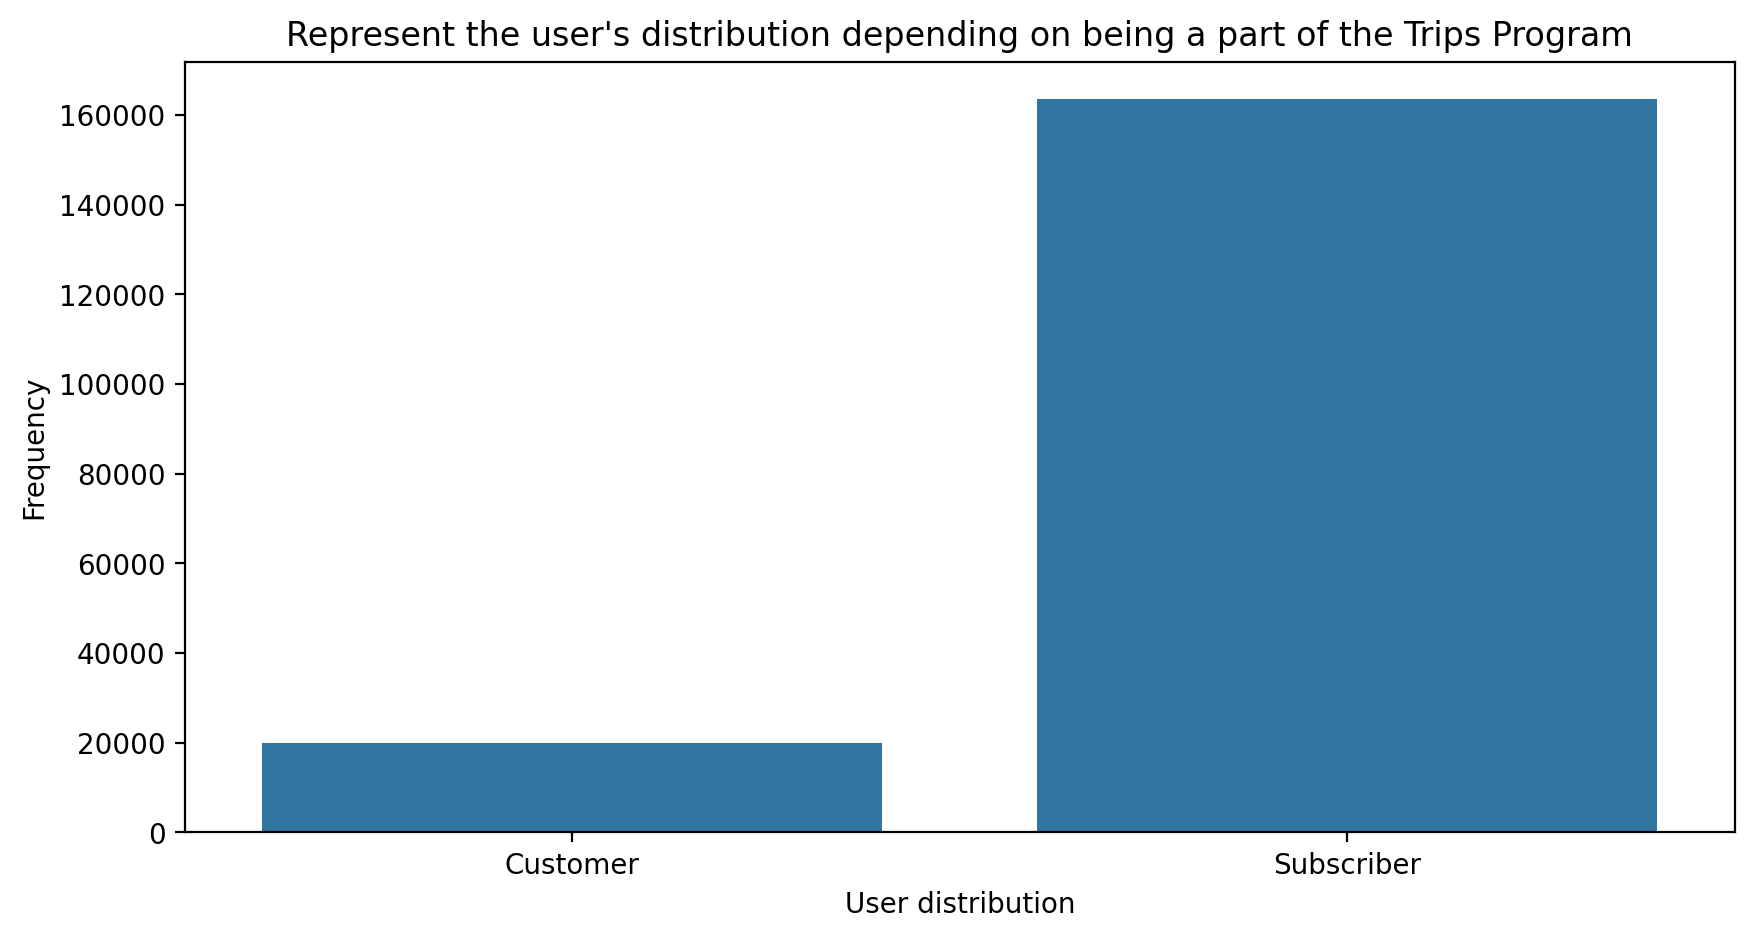

In [105]:
## I will import seaborn library to support me in making visualizations 

import seaborn as sns
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data=df , x = 'user_type')
plot
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

> ### <mark>Your analsys and exploration here </mark>

# <a id="2"> 2 ) What is the distribution for the bike share users on all Trips?</a>

> ### <mark>Your analsys and exploration here </mark>

# <a id="3"> 3 ) What is the distribution for users' ages? </a>

> ### <mark>Your analsys and exploration here </mark>


# <a id="4">  4 ) . Do the users' ages have outlier values?</a>


> ### <mark>Your analsys and exploration here </mark>

# <a id="5">  5 ) . What is the distribution for the trip duration in minutes? </a>

In [57]:
## Review the statistic for trip duration in minutes



In [58]:
# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>


# <a id="6"> 6 ) . What is the distribution for member_gender?</a>

In [59]:
# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

# <a id="7">    7 )  . What is the distribution for the trip duration in Hours?  </a>

In [60]:
# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

### The variables distribution:


> The distribution of duration present that most of the trips were less than 30 minutes ( we can notice that from the minutes and the hour charts )


> And the Age distribution is ( left Skewed ) as most users age are  22 - 39


> Most users are subscribers, not Customers and  Males as shown in the charts above.



### Were there any interesting and outliers 


- We got Age outliers for for more than 100 .



- The distribution of duration was strange where the minutes and the hour charts were 30 minutes or less.

# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Bivariate Exploration</p>
# <a id="111"> Bivariate Exploration</a>

Now let's investigate relationships between pairs of variables in our data.

# <a id="8"> 8) . What the average duration of trip for the categories of user type?</a>

In [61]:
# Distribution of Age by user types



# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

# <a id="9">    9 ) . How long is the duration of the trip for each gender in minutes?  </a>

In [62]:
# Make visualization to easy get insight

# ------------------------Duration distribution by member gender



# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

# <a id="10 "> 10 ) . How long is the duration of the trip for each user_type in minutes?  </a>

In [63]:

# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

# <a id="11">  11 ) . How the user distribution depending on their Age and user_type ? </a>

In [64]:

# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

#  <a id="12"> 12 ). How the user distribution depending on their Age and member_gender ?</a>

In [65]:
# Make visualization to easy get insight


> ### <mark>Your analsys and exploration here </mark>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> ...................


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> ....................

# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Multivariate Exploration</p>
# <a id="1111"> Multivariate Exploration </a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [66]:
## check your work 



# <a id="13">  13 ) . What is the  Correlation between each variable in the dataset?</a>

In [67]:
# Make visualization to easy get insight




> ### <mark>Your analsys and exploration here </mark>

Example usage
- There is `no Correlation` for any variable with time ( `duration sec /minutes/hours`)



# <a id="14"> 14 )  .  What is the  Correlation between `specific numeric variables` in the dataset?</a>


In [68]:
# Make visualization to easy get insight




> ### <mark>Your analsys and exploration here </mark>

Example usage
- There is `no Correlation` for any variable with time ( `duration sec /minutes`)




- 




- 




# <a id="15">  15 ) What is the  Correlation between data_stat variables in the dataset?</a>


In [69]:

"""""This time I will use heatmap  to explain how Correlation between data_stat variables

in the dataset in more clear and specific percentage"""

# Make visualization to easy get insight



'""This time I will use heatmap  to explain how Correlation between data_stat variables\n\nin the dataset in more clear and specific percentage'

> ### <mark>The above charts show how Correlation between specific numeric variables in the dataset using heatmap plots  </mark>



**Actually the `heat map`  display the above ideas in clear percentages**



- There is `no Correlation` for any variable with time ( `duration sec /minutes`)




- There is a `negative  Correlation` between  member_birth_year  and age which normal.




- There is `no significant Correlation` for any variable with `bike_id `



# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Conclusions</p>
# <a id="1100"> Conclusions </a>

#example
- Most users were Male.


- 

- 

- 



## limitation 
example
- We got missing data which we fix some of them .

- 
